In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Dataframe from MDA_merge_data.ipynb is loaded, datetime column is dropped in order to run model.

In [2]:
df = pd.read_csv("C:\\Users\Arthur\hello\MDA_dataframeArthur.csv")
df_nd = df.drop('result_timestamp', axis=1)

In [3]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

The target dataset (y) and predictor dataset (X) are created. For y, noise is converted to relative noise (proportion of max value)

In [4]:
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [5]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [6]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=4320,
    max_train_size=10000,
    test_size=1000,
)

In [7]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,Unnamed: 0,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
32951,33059,14,4,19,8,0,52.0,15.73,32.0,437.0,0.0,0.0,-8.0,0.08,373.0,26.25,26.25,26.193,25.146406
32952,33060,14,4,19,8,0,50.0,15.36,32.0,469.0,0.0,0.0,171.0,0.02,230.0,26.53,26.53,26.473,25.640656
32953,33061,14,4,19,8,0,50.0,15.61,31.0,470.0,0.0,0.0,143.0,0.36,228.0,27.05,27.05,26.993,26.296341
32954,33062,14,4,19,8,0,50.0,15.90,32.0,269.0,0.0,0.0,105.0,0.39,297.0,27.31,27.31,27.253,26.501806
32955,33063,14,4,19,8,0,51.0,16.22,31.0,187.0,0.0,0.0,144.0,0.07,397.0,27.32,27.32,27.263,26.213027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42946,43068,2,4,28,10,0,91.0,13.00,38.0,0.0,0.0,0.0,0.0,0.00,0.0,14.39,14.39,14.333,14.198870
42947,43069,2,4,28,10,0,90.0,12.83,37.0,0.0,0.0,0.0,-102.0,0.00,0.0,14.39,14.39,14.333,14.185340
42948,43070,2,4,28,10,0,90.0,12.78,38.0,0.0,0.0,0.0,0.0,0.00,0.0,14.39,14.39,14.333,14.206740
42949,43071,2,4,28,10,0,90.0,12.78,37.0,0.0,0.0,0.0,-92.0,0.04,0.0,14.39,14.39,14.333,14.314940


In [8]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,Unnamed: 0,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
36951,37061,9,4,16,9,0,84.0,13.90,32.0,163.0,0.0,0.0,59.0,0.03,117.0,16.59,16.59,16.533,16.339917
36952,37062,9,4,16,9,0,82.0,13.60,32.0,210.0,0.0,0.0,-172.0,0.02,127.0,16.78,16.78,16.723,16.384344
36953,37063,9,4,16,9,0,79.0,13.46,31.0,165.0,0.0,0.0,98.0,0.04,134.0,17.07,17.07,17.013,16.527561
36954,37064,9,4,16,9,0,79.0,13.63,32.0,144.0,0.0,0.0,-6.0,0.03,139.0,17.31,17.31,17.253,16.762182
36955,37065,9,4,16,9,0,80.0,14.00,32.0,142.0,0.0,0.0,27.0,0.02,161.0,17.49,17.49,17.433,16.968314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46946,47083,23,3,24,11,0,86.0,6.88,37.0,0.0,0.0,0.0,-81.0,0.12,0.0,9.11,9.11,9.053,9.123540
46947,47084,23,3,24,11,0,86.0,6.92,38.0,0.0,0.0,0.0,26.0,0.03,0.0,9.17,9.17,9.113,9.154146
46948,47085,23,3,24,11,0,85.0,6.81,37.0,0.0,0.0,0.0,36.0,0.21,0.0,9.22,9.22,9.163,9.262167
46949,47086,23,3,24,11,0,85.0,6.78,38.0,0.0,0.0,0.0,78.0,0.13,0.0,9.22,9.22,9.163,9.232913


In [22]:
# grid search for hyperparameter tuning

param_grid = {
    'learning_rate': (0.01, 0.02, 0.03, 0.04),
    'n_estimators': (50, 60, 70),
    'max_depth' : (2, 3, 4)}
model = xgb.XGBRegressor()
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=ts_cv)
model_grid_search.fit(X, y)


c:\Users\Arthur\miniconda3\envs\course_mda\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=TimeSeriesSplit(gap=4320, max_train_size=10000, n_splits=5, test_size=1000),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=2,
             param_grid={'learning_rate': (0.01, 0.02, 0.03, 0.04),
                         'max_depth': (2, 3, 4), 'n_estimators': (50, 60, 70)})

In [23]:
accuracy = model_grid_search.score(X, y)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.68


In [24]:
model_grid_search.predict(X.iloc[0:5])

array([0.5027953, 0.5027953, 0.5027953, 0.5027953, 0.5027953],
      dtype=float32)

In [25]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 70}


In [26]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.674712,0.099385,0.006885,0.000800,0.03,3,70,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.749245,0.700156,0.754524,0.725939,0.400158,0.666004,0.134311,1
30,0.543345,0.005472,0.007881,0.001680,0.04,3,50,"{'learning_rate': 0.04, 'max_depth': 3, 'n_est...",0.743969,0.689488,0.750614,0.721863,0.418251,0.664837,0.125127,2
22,0.520073,0.017807,0.006784,0.000400,0.03,3,60,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.722123,0.669649,0.757784,0.708502,0.462967,0.664205,0.104499,3
33,0.654889,0.029232,0.008974,0.002520,0.04,4,50,"{'learning_rate': 0.04, 'max_depth': 4, 'n_est...",0.766138,0.670857,0.716197,0.743184,0.403733,0.660022,0.132010,4
25,0.719936,0.020490,0.008384,0.001502,0.03,4,60,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.748017,0.637295,0.712842,0.730127,0.454944,0.656645,0.107670,5


In [27]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [28]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_n_estimators,param_max_depth,mean_test_score,std_test_score,rank_test_score
23,0.03,70,3,0.666004,0.134311,1
30,0.04,50,3,0.664837,0.125127,2
22,0.03,60,3,0.664205,0.104499,3
33,0.04,50,4,0.660022,0.132010,4
25,0.03,60,4,0.656645,0.107670,5
31,0.04,60,3,0.650991,0.160503,6
26,0.03,70,4,0.650769,0.139424,7
34,0.04,60,4,0.645862,0.167806,8
21,0.03,50,3,0.641744,0.066269,9
24,0.03,50,4,0.639522,0.080276,10


In [29]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["param_learning_rate"],
    columns=["param_n_estimators"])

pivoted_cv_results

param_n_estimators,50,60,70
param_learning_rate,,,
0.01,-0.105209,0.065682,0.201658
0.02,0.464609,0.556606,0.609876
0.03,0.627134,0.649136,0.649162
0.04,0.651993,0.641691,0.621587


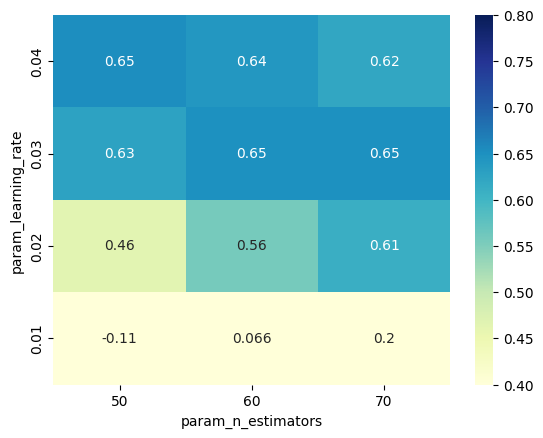

In [30]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.4,
                 vmax=0.8)
ax.invert_yaxis()

In [34]:
#run XGBoost model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(xgb.XGBRegressor(learning_rate=0.03,n_estimators=70,max_depth=3)).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.035 +/- 0.007
Root Mean Squared Error: 0.044 +/- 0.008


In [35]:
#feature importance
xgb_reg = xgb.XGBRegressor(learning_rate=0.02,n_estimators=120,max_depth=5, importance_type='gain').fit(X,y)
xgb_reg.get_booster().get_score(importance_type='gain')


{'Unnamed: 0': 0.3599219024181366,
 'hour': 5.796309947967529,
 'day': 0.9784735441207886,
 'day_of_month': 0.15469160676002502,
 'LC_HUMIDITY': 0.11564876139163971,
 'LC_DWPTEMP': 0.1334259808063507,
 'LC_n': 0.4146125912666321,
 'LC_RAD': 0.6178025603294373,
 'LC_DAILYRAIN': 0.10325908660888672,
 'LC_WINDDIR': 0.015217340551316738,
 'LC_WINDSPEED': 0.006173428148031235,
 'LC_RAD60': 0.1729886531829834,
 'LC_TEMP_QCL0': 0.19608990848064423,
 'LC_TEMP_QCL3': 0.141368567943573}

In [36]:
weight = xgb_reg.get_booster().get_score(importance_type='weight')
gain = xgb_reg.get_booster().get_score(importance_type='gain')
cover = xgb_reg.get_booster().get_score(importance_type='cover')
total_gain = xgb_reg.get_booster().get_score(importance_type='total_gain')
total_cover = xgb_reg.get_booster().get_score(importance_type='total_cover')

f_importance_weight = xgb_reg.get_booster().get_score(importance_type='weight')
importance_df_weight = pd.DataFrame.from_dict(data=f_importance_weight, 
                                       orient='index')
f_importance_gain = xgb_reg.get_booster().get_score(importance_type='gain')
importance_df_gain = pd.DataFrame.from_dict(data=f_importance_gain, 
                                       orient='index')
f_importance_cover = xgb_reg.get_booster().get_score(importance_type='cover')
importance_df_cover = pd.DataFrame.from_dict(data=f_importance_cover, 
                                       orient='index')
f_importance_total_gain = xgb_reg.get_booster().get_score(importance_type='total_gain')
importance_df_total_gain = pd.DataFrame.from_dict(data=f_importance_total_gain, 
                                       orient='index')
f_importance_total_cover = xgb_reg.get_booster().get_score(importance_type='total_cover')
importance_df_total_cover = pd.DataFrame.from_dict(data=f_importance_total_cover, 
                                       orient='index')

feature_importance = pd.concat([importance_df_weight, importance_df_gain, importance_df_cover, importance_df_total_gain, importance_df_total_cover], axis=1)
feature_importance

,0,0,0,0,0
Unnamed: 0,1203.0,0.359922,5461.334961,432.986053,6569986.0
hour,1060.0,5.796310,14570.703125,6144.088379,15444945.0
day,774.0,0.978474,8374.050781,757.338501,6481515.0
day_of_month,78.0,0.154692,5780.846191,12.065946,450906.0
LC_HUMIDITY,65.0,0.115649,5587.046387,7.517169,363158.0
LC_DWPTEMP,128.0,0.133426,1827.437500,17.078526,233912.0
LC_n,11.0,0.414613,3543.909180,4.560739,38983.0
LC_RAD,58.0,0.617803,13789.258789,35.832550,799777.0
LC_DAILYRAIN,13.0,0.103259,4058.076904,1.342368,52755.0
LC_WINDDIR,32.0,0.015217,133.906250,0.486955,4285.0
